# EDA

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import settings

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (9, 3)

In [2]:
df = pd.read_csv(os.path.join(settings.PROJECT_ROOT, settings.AUCTION_SUMMARY_FILE))

In [3]:
df.head()

,x,bid,auctions,wins
0,0.585202,2.719391,7,7
1,4.567498,2.688336,2,2
2,1.481628,0.200173,4,0
3,0.828790,0.187734,4,0
4,1.988679,5.792509,7,7


## Number of winning bids

In [4]:
df = df.assign(winning_bid=lambda x: x.bid >= x.auctions)
df.winning_bid.value_counts()

winning_bid
False    457
True      48
Name: count, dtype: int64

## Probability of winning the auction with a certain bid price

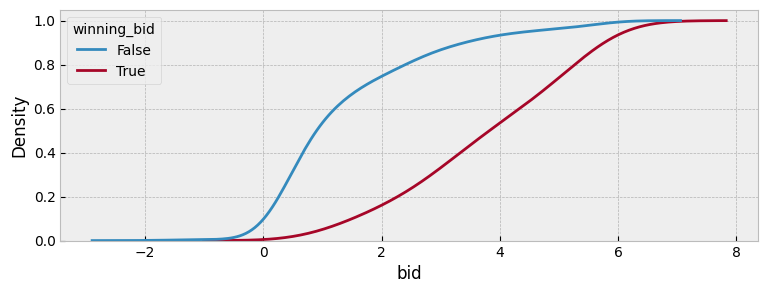

In [7]:
sns.kdeplot(df, x="bid", hue="winning_bid", common_norm=False, cumulative=True);

In [8]:
df = df.assign(qx=lambda df: pd.cut(df.x, 10, precision=1))

## Item values function of x

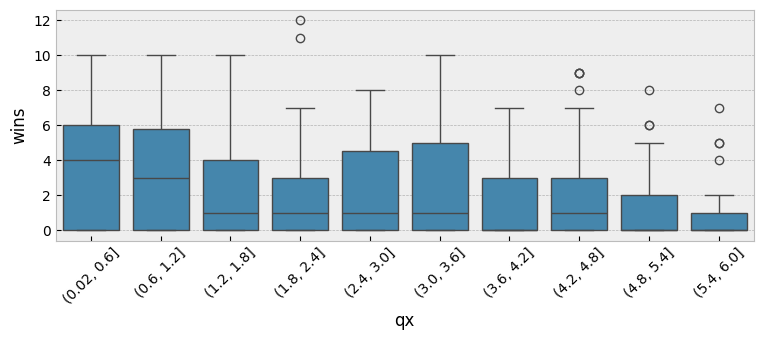

In [10]:
sns.boxplot(df, x="qx", y="wins")
plt.xticks(rotation=45);

> The value average value of the auction decrease as x increases especially for $x \in [0, 1.2]$. If participants have the same information as we have, the auctions should be fiercer for small values of x.

## Auction price function of x

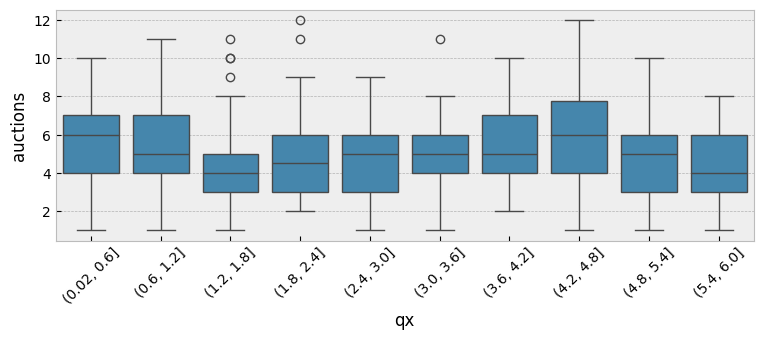

In [12]:
sns.boxplot(df, x="qx", y="auctions")
plt.xticks(rotation=45);

## Number of winning bids and average bid function of x

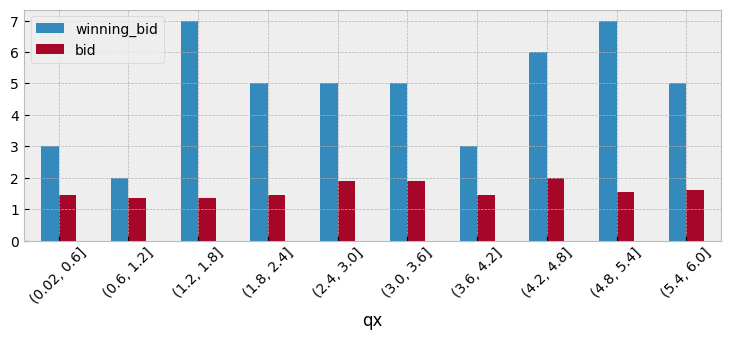

In [26]:
(
    df.groupby("qx", observed=True)[["winning_bid"]].sum()
    .reset_index()
    .merge(df.groupby("qx", observed=True)[["bid"]].mean().reset_index())
    .set_index("qx")
).plot.bar();
plt.xticks(rotation=45);

> There are fewer wins for $x \in [0, 1.2]$. Norrmally, we can think this is an observation there are more stakeholders for small values of x because this is where the auction value is greater.

## Item value when we win the auction

In [27]:
df.query("winning_bid").wins.value_counts()

wins
3    13
2     9
4     9
0     7
1     6
5     4
Name: count, dtype: int64